In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.4.0


In [7]:
#read the dataset
#df=pd.read_csv('training_permissions.csv')
df=pd.read_csv('training.csv')

In [8]:
#view of the dataset
df.head()

,"<actionandroid:name=""android.intent.action.FILEEXPLORE""/>\n","<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgcontentactivity""/>\n","<actionandroid:name=""android.net.wifi.p2p.THIS_DEVICE_CHANGED""/>\n","<actionandroid:name=""com.citc.weather.widget.WIDGET_FORECAST_UPDATE""/>\n","<actionandroid:name=""com.meetup.action.GENERIC_SYNC""/>\n","<actionandroid:name=""br.com.mobicare.wifimanager.ACTION_WITHOUT_KNOW_NETWORKS""/>\n","<actionandroid:name=""com.krecorder.call.broadcast.UPLOAD_RETRY""/>\n","<actionandroid:name=""com.kreactive.digischool.bac.ACTION_UPDATE_CATEGORY_QUIZ_PROGRESS""/>\n","<actionandroid:name=""com.tpadsz.action.locker""/>\n","<actionandroid:name=""com.traceup.android.tracesnow.AddVisitComment.action.launch""/>\n","<actionandroid:name=""Wifi_SMS_DELIVERED""/>\n","<actionandroid:name=""com.ciamedia.caller.id.intent.SEND_PROFILE_UPDATE""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyAlphaUNITEDARABEMIRATES""/>\n","<actionandroid:name=""com.avg.cleaner.actions.ACTION_CV_FINISHED_ON_BATCH""/>\n","<actionandroid:name=""com.mbapp.smartsystem.intent.MBSTPH""/>\n","<actionandroid:name=""dev.cleaner.ANALYSE""/>\n","<actionandroid:name=""com.google.android.apps.chrome.webapps.WebappManager.ACTION_START_WEBAPP""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS6CHINA""/>\n","<actionandroid:name=""com.yundong.plugin.intent.action.START""/>\n","<actionandroid:name=""com.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST""/>\n","<actionandroid:name=""com.parse.push.intent.OPEN""/>\n","<actionandroid:name=""com.push2.sdk.FILEDOWN_SERVICER""/>\n","<actionandroid:name=""com.jb.gosms.fm.START_FREE_MSG_XMPP_SERVICE""/>\n","<actionandroid:name=""com.alexandrucene.dayhistory.intent.OPEN_FROM_WIDGET""/>\n","<actionandroid:name=""com.sonyericsson.extras.aef.widget.ONTOUCH""/>\n","<actionandroid:name=""com.microsoft.onlineid.internal.PICK_ACCOUNT""/>\n","<actionandroid:name=""com.google.android.apps.authenticator.seedrotation.SeedRotationService.Ping""/>\n","<actionandroid:name=""RPNReceiver.play_kyls""/>\n","<actionandroid:name=""ata.squid.common.link.AtaAccountCommonActivity""/>\n","<actionandroid:name=""com.textmeinc.textme.WearableDispatcherBroadcastReceiver.ACTION_STICKERS""/>\n","<actionandroid:name=""com.modoohut.dialer.MISSED_CALL_NOTIFICATION_DELETED""/>\n","<actionandroid:name=""com.cibc.mobi.android.MY_ACCOUNTS""/>\n","<actionandroid:name=""com.designfuture.music.service.MusicIDService.NO_CONNECTION""/>\n","<actionandroid:name=""namco.wireless.push.notify.ALERT_DIALOG""/>\n","<actionandroid:name=""at.prefs.widgets_content""/>\n","<actionandroid:name=""com.twenty_four_option_app.intent.APPBOY_PUSH_RECEIVED""/>\n","<actionandroid:name=""com.life360.android.safetymapd.update.SEND_UPDATE""/>\n","<actionandroid:name=""com.jawbone.up.settings.ActivityAlertActivity""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote3UNITEDSTATESTMOBILE""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNoteEdgeMALAYSIA""/>\n",...,ru.mail.permission.C2D_MESSAGE\n,com.timeplay.permission.C2D_MESSAGE\n,com.foursquare.permission.ACCOUNTS\n,com.fongo.dellvoice.permission.EXTENSIONS_RECEIVE\n,insiderperks.com.permission.C2D_MESSAGE\n,com.cyanogenmod.trebuchet.permission.READ_SETTINGS\n,com.mapswithme.maps.pro.permission.C2D_MESSAGE\n,com.madebyappolis.spinrilla.permission.C2D_MESSAGE\n,com.myhero.fh.permission.C2D_MESSAGE\n,android.permission.ACCESS_NETWORK_STATEmaxSdkVersion=21\n,com.espn.score_center.permission.C2D_MESSAGE\n,com.sonelli.juicessh.api.v1.permission.WRITE_CONNECTION_GROUPS\n,com.sexyactioncool.BejeweledBlitz.permission.C2D_MESSAGE\n,com.foap.android.permission.READ_SETTINGS\n,com.ejercicioscaseros.permission.C2D_MESSAGE\n,com.ms.office365admin.permission.C2D_MESSAGE\n,com.olxmena.horizontal.permission.RECEIVE_ADM_MESSAGE\n,com.color.mandala.permission.C2D_MESSAGE\n,com.asiainno.uplive.permission.MIPUSH_RECEIVE\n,com.lastpass.lpandroid.permission.C2D_MESSAGE\n,co

In [9]:
#no of rows and columns
df.shape

(954, 8115)

In [10]:
#checking missing values
df.isna().sum()

<actionandroid:name="android.intent.action.FILEEXPLORE"/>\n                     0
<actionandroid:name="com.jb.gokeyboard.messagecenter.msgcontentactivity"/>\n    0
<actionandroid:name="android.net.wifi.p2p.THIS_DEVICE_CHANGED"/>\n              0
<actionandroid:name="com.citc.weather.widget.WIDGET_FORECAST_UPDATE"/>\n        0
<actionandroid:name="com.meetup.action.GENERIC_SYNC"/>\n                        0
                                                                               ..
com.flyersoft.moonreader.permission.C2D_MESSAGE\n                               0
family                                                                          0
cat                                                                             0
MD5                                                                             0
Binary_Type                                                                     0
Length: 8115, dtype: int64

In [11]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Columns: 8115 entries, <actionandroid:name="android.intent.action.FILEEXPLORE"/>
 to Binary_Type
dtypes: int64(8112), object(3)
memory usage: 59.1+ MB


In [12]:
df.select_dtypes(include=['object'])

,family,cat,MD5
0,ewind,Adware,0054d35c7bc28a76d79e6ba7887c341f
1,ewind,Adware,03e8e080616cc50e06ddfea24aed0623
2,ewind,Adware,1de012d8de8b0be0d0b27da1a0c03f52
3,ewind,Adware,1e680e1a75f5508f48f56b85bbc254fe
4,ewind,Adware,1e87d0abe94a38b5e305ac6371b4190f
...,...,...,...
949,smssniffer,SMS,0eee13df20ee4ad1f60305dacc661873
950,smssniffer,SMS,6bfad4df4b512260973a54753b1494ef
951,smssniffer,SMS,82fb2b41e1e0155c50d2a2c850180cc4
952,smssniffer,SMS,a1593777ac80b828d2d520d24809829d


In [13]:
# statistical information of the datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
"<actionandroid:name=""android.intent.action.FILEEXPLORE""/>\n",954.0,0.001048,0.032376,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgcontentactivity""/>\n",954.0,0.002096,0.045763,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""android.net.wifi.p2p.THIS_DEVICE_CHANGED""/>\n",954.0,0.005241,0.072243,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""com.citc.weather.widget.WIDGET_FORECAST_UPDATE""/>\n",954.0,0.001048,0.032376,0.0,0.0,0.0,0.0,1.0
"<actionandroid:name=""com.meetup.action.GENERIC_SYNC""/>\n",954.0,0.001048,0.032376,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
android.permission.FORCE_STOP_PACKAGES\n,954.0,0.003145,0.056018,0.0,0.0,0.0,0.0,1.0
com.copyop.android.app.permission.C2D_MESSAGE\n,954.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
com.sports.scores.baseball.schedule.toronto.blue_jays.permission.C2D_MESSAGE\n,954.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
com.flyersoft.moonreader.permission.C2D_MESSAGE\n,954.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
#Changed from the above line to the lower line.
df.drop(['MD5','family','cat'], axis=1, inplace=True)
#df.drop(['<MD5>','<family>','<category>'], axis=1, inplace=True)
#weights = tf.Variable(np.ones([100,10],dtype='float32'), name=weights)
#value = weights.eval();
#df = pd.get_dummies(df, columns=['cat'])

In [15]:
df.shape

(954, 8112)

In [16]:
#view of the dataset
df.head()

,"<actionandroid:name=""android.intent.action.FILEEXPLORE""/>\n","<actionandroid:name=""com.jb.gokeyboard.messagecenter.msgcontentactivity""/>\n","<actionandroid:name=""android.net.wifi.p2p.THIS_DEVICE_CHANGED""/>\n","<actionandroid:name=""com.citc.weather.widget.WIDGET_FORECAST_UPDATE""/>\n","<actionandroid:name=""com.meetup.action.GENERIC_SYNC""/>\n","<actionandroid:name=""br.com.mobicare.wifimanager.ACTION_WITHOUT_KNOW_NETWORKS""/>\n","<actionandroid:name=""com.krecorder.call.broadcast.UPLOAD_RETRY""/>\n","<actionandroid:name=""com.kreactive.digischool.bac.ACTION_UPDATE_CATEGORY_QUIZ_PROGRESS""/>\n","<actionandroid:name=""com.tpadsz.action.locker""/>\n","<actionandroid:name=""com.traceup.android.tracesnow.AddVisitComment.action.launch""/>\n","<actionandroid:name=""Wifi_SMS_DELIVERED""/>\n","<actionandroid:name=""com.ciamedia.caller.id.intent.SEND_PROFILE_UPDATE""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyAlphaUNITEDARABEMIRATES""/>\n","<actionandroid:name=""com.avg.cleaner.actions.ACTION_CV_FINISHED_ON_BATCH""/>\n","<actionandroid:name=""com.mbapp.smartsystem.intent.MBSTPH""/>\n","<actionandroid:name=""dev.cleaner.ANALYSE""/>\n","<actionandroid:name=""com.google.android.apps.chrome.webapps.WebappManager.ACTION_START_WEBAPP""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyS6CHINA""/>\n","<actionandroid:name=""com.yundong.plugin.intent.action.START""/>\n","<actionandroid:name=""com.sonyericsson.extras.liveware.aef.registration.EXTENSION_REGISTER_REQUEST""/>\n","<actionandroid:name=""com.parse.push.intent.OPEN""/>\n","<actionandroid:name=""com.push2.sdk.FILEDOWN_SERVICER""/>\n","<actionandroid:name=""com.jb.gosms.fm.START_FREE_MSG_XMPP_SERVICE""/>\n","<actionandroid:name=""com.alexandrucene.dayhistory.intent.OPEN_FROM_WIDGET""/>\n","<actionandroid:name=""com.sonyericsson.extras.aef.widget.ONTOUCH""/>\n","<actionandroid:name=""com.microsoft.onlineid.internal.PICK_ACCOUNT""/>\n","<actionandroid:name=""com.google.android.apps.authenticator.seedrotation.SeedRotationService.Ping""/>\n","<actionandroid:name=""RPNReceiver.play_kyls""/>\n","<actionandroid:name=""ata.squid.common.link.AtaAccountCommonActivity""/>\n","<actionandroid:name=""com.textmeinc.textme.WearableDispatcherBroadcastReceiver.ACTION_STICKERS""/>\n","<actionandroid:name=""com.modoohut.dialer.MISSED_CALL_NOTIFICATION_DELETED""/>\n","<actionandroid:name=""com.cibc.mobi.android.MY_ACCOUNTS""/>\n","<actionandroid:name=""com.designfuture.music.service.MusicIDService.NO_CONNECTION""/>\n","<actionandroid:name=""namco.wireless.push.notify.ALERT_DIALOG""/>\n","<actionandroid:name=""at.prefs.widgets_content""/>\n","<actionandroid:name=""com.twenty_four_option_app.intent.APPBOY_PUSH_RECEIVED""/>\n","<actionandroid:name=""com.life360.android.safetymapd.update.SEND_UPDATE""/>\n","<actionandroid:name=""com.jawbone.up.settings.ActivityAlertActivity""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNote3UNITEDSTATESTMOBILE""/>\n","<actionandroid:name=""com.MrDeveloper.SamsungGalaxyNoteEdgeMALAYSIA""/>\n",...,com.lo.generaladaptiveapps.permission.C2D_MESSAGE\n,ca.autotrader.userapp.permission.C2D_MESSAGE\n,se.dn.permission.C2D_MESSAGE\n,ru.mail.permission.C2D_MESSAGE\n,com.timeplay.permission.C2D_MESSAGE\n,com.foursquare.permission.ACCOUNTS\n,com.fongo.dellvoice.permission.EXTENSIONS_RECEIVE\n,insiderperks.com.permission.C2D_MESSAGE\n,com.cyanogenmod.trebuchet.permission.READ_SETTINGS\n,com.mapswithme.maps.pro.permission.C2D_MESSAGE\n,com.madebyappolis.spinrilla.permission.C2D_MESSAGE\n,com.myhero.fh.permission.C2D_MESSAGE\n,android.permission.ACCESS_NETWORK_STATEmaxSdkVersion=21\n,com.espn.score_center.permission.C2D_MESSAGE\n,com.sonelli.juicessh.api.v1.permission.WRITE_CONNECTION_GROUPS\n,com.sexyactioncool.BejeweledBlitz.permission.C2D_MESSAGE\n,com.foap.android.permission.READ_SETTINGS\n,com.ejercicioscaseros.permission.C2D_MESSAGE\n,com.ms.office365admin.permission.C2D_MESSAGE\n,com.olxmena.horizontal.permission.RECEIVE_ADM_MESSAGE\n,com.color.m

In [17]:
#Divide the data set into training and test sets
X=df.drop(['Binary_Type'], axis=1)
y=df['Binary_Type']

#X=df.drop(['cat'], axis=1)
#y=df['cat']

In [18]:
df.shape

(954, 8112)

In [19]:
# Normalize the train and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
# training test split and test size is 30 while training size is 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [ ]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=8111))
#Second  Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [ ]:
#Compiling the neural network
#classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
#Fitting the data to the training dataset
#classifier.fit(X_train,y_train, batch_size=100, epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 11ms/step - loss: 0.6638 - accuracy: 0.6774
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.5588 - accuracy: 0.7347
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4685 - accuracy: 0.7473
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4016 - accuracy: 0.7797
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.3652 - accuracy: 0.8144
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3095 - accuracy: 0.8713
Epoch 7/50
7/7 [==============================] - 0s 11ms/step - loss: 0.2724 - accuracy: 0.8844
Epoch 8/50
7/7 [==============================] - 0s 11ms/step - loss: 0.2366 - accuracy: 0.9133
Epoch 9/50
7/7 [==============================] - 0s 11ms/step - loss: 0.1865 - accuracy: 0.9302
Epoch 10/50
7/7 [==============================] - 0s 9ms/step - loss: 0.1525 - accuracy: 0.9505
Epoch 11/50
7/7 [=============

In [ ]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

21/21 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9880


[0.04457145929336548, 0.9880059957504272]

In [ ]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)
#epochs=150
#history = classifier.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[214  10]
 [ 10  53]]


In [ ]:
print("Accuracy of the model:", accuracy_score(y_test, y_pred)*100)

Accuracy of the model: 93.03135888501743


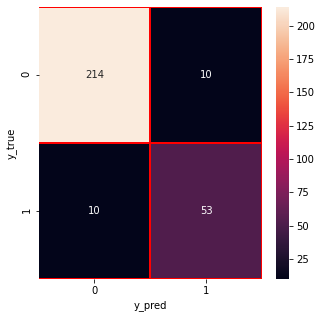

In [ ]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.7,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
# classification report of the model
print("classification report:")
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       224
           1       0.84      0.84      0.84        63

    accuracy                           0.93       287
   macro avg       0.90      0.90      0.90       287
weighted avg       0.93      0.93      0.93       287



In [ ]:
X_train.shape, X_test.shape

((667, 8111), (287, 8111))

In [ ]:
X_train = X_train.reshape(667,8111,1)
X_test = X_test.reshape(287, 8111, 1)

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape = (8111,1))) #32
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))#64
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8110, 64)          192       
_________________________________________________________________
batch_normalization (BatchNo (None, 8110, 64)          256       
_________________________________________________________________
dropout (Dropout)            (None, 8110, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8109, 128)         16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8109, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8109, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1037952)          

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
21/21 [==============================] - 56s 3s/step - loss: 1.2178 - accuracy: 0.6661 - val_loss: 0.6605 - val_accuracy: 0.8606
Epoch 2/50
21/21 [==============================] - 54s 3s/step - loss: 0.4903 - accuracy: 0.8053 - val_loss: 0.6618 - val_accuracy: 0.6098
Epoch 3/50
21/21 [==============================] - 54s 3s/step - loss: 0.3380 - accuracy: 0.8763 - val_loss: 0.6616 - val_accuracy: 0.8362
Epoch 4/50
21/21 [==============================] - 54s 3s/step - loss: 0.3723 - accuracy: 0.8565 - val_loss: 0.7464 - val_accuracy: 0.3206
Epoch 5/50
21/21 [==============================] - 58s 3s/step - loss: 0.9225 - accuracy: 0.9032 - val_loss: 0.6939 - val_accuracy: 0.8606
Epoch 6/50
21/21 [==============================] - 55s 3s/step - loss: 0.3075 - accuracy: 0.8789 - val_loss: 0.7745 - val_accuracy: 0.4146
Epoch 7/50
21/21 [==============================] - 54s 3s/step - loss: 0.3182 - accuracy: 0.9055 - val_loss: 0.8447 - val_accuracy: 0.3206
Epoch 8/50
21/21 [==

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmphewm99g9/assets


In [ ]:
history.history

{'accuracy': [0.7151424288749695,
  0.8140929341316223,
  0.8665667176246643,
  0.8695651888847351,
  0.8905547261238098,
  0.8875561952590942,
  0.8980509638786316,
  0.9070464968681335,
  0.908545732498169,
  0.9115442037582397,
  0.9055472016334534,
  0.9160419702529907,
  0.9250375032424927,
  0.9265367388725281,
  0.9220389723777771,
  0.9325337409973145,
  0.9265367388725281,
  0.9385307431221008,
  0.947526216506958,
  0.9325337409973145,
  0.9445277452468872,
  0.9400299787521362,
  0.9325337409973145,
  0.9385307431221008,
  0.9415292143821716,
  0.9415292143821716,
  0.947526216506958,
  0.9355322122573853,
  0.9325337409973145,
  0.9385307431221008,
  0.9340329766273499,
  0.947526216506958,
  0.9430285096168518,
  0.947526216506958,
  0.9430285096168518,
  0.947526216506958,
  0.9325337409973145,
  0.9370315074920654,
  0.9430285096168518,
  0.9460269808769226,
  0.9550225138664246,
  0.95652174949646,
  0.9580209851264954,
  0.9610195159912109,
  0.9655172228813171,
  0.94

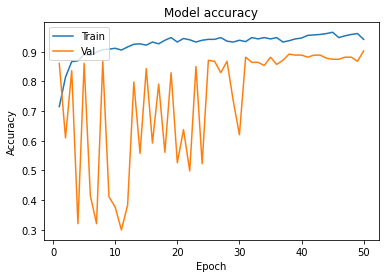

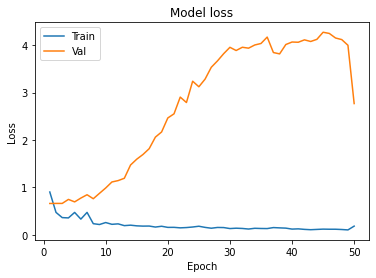

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
print("Accuracy of the model:", accuracy_score(y_test, y_pred)*100)

Accuracy of the model: 93.03135888501743


In [4]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
print (input_shape)
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


[   1 1025    1]
[[0.24411413]]
